In [56]:
import LinearAlgebra: I, ⋅
import Base.MathConstants: φ, pi
import Base: cos 
import Statistics: mean
abstract type DescentMethod end

In [51]:
using PyPlot
using Zygote

In [52]:
f_rosenbrock(x)  = 100*(x[2] - x[1]^2)^2 + (1-x[1])^2
∇f_rosenbrock(x) = [
    400x[1]^3 - 400x[1]*x[2] + 2x[1] - 2,
    200x[2] - 200x[1]^2
]
# a = 20, b = 0.2 and c = 2π.
f_ackley(x, a=20,b=0.2,c = 2 * pi) = -a * exp(-b * sqrt(mean(x.^2))) - exp( mean( cos.(c .* x))) + a + exp(1)
∇f_ackley(x) = f_ackley'(x)

f_schwefel(x) = 418.9829 * x.length - sum(x .* sin)

f_schwefel (generic function with 1 method)

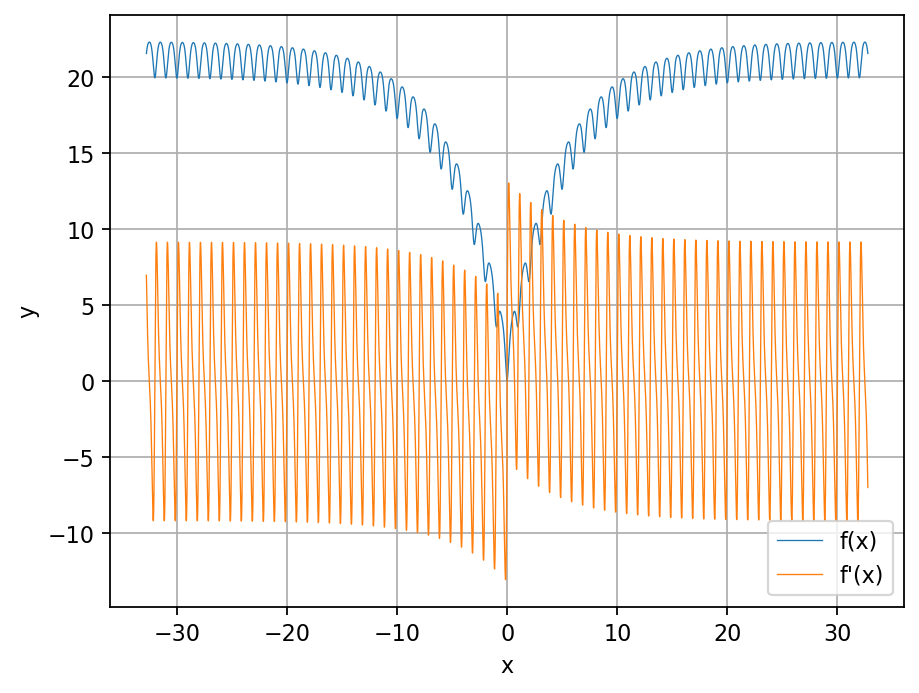

In [53]:
min = -32.768
max = - 1* min
size = 10^4
x = collect(LinRange(min,max, size))
x_der = collect(LinRange(min,max, size))

y = f_ackley.(x)
der = f_ackley'.(x_der)

PyPlot.figure(1, dpi=160)
PyPlot.plot(x, y, linewidth=0.6 ,label="f(x)")
# PyPlot.plot(x, der)
p1 = PyPlot.plot(x_der,der,linewidth=0.6, label="f'(x)")
p2 = PyPlot.legend()
xlabel("x")
ylabel("y")
grid("on")
PyPlot.title("Funkcja Ackley'a 1 zmiennej")
PyPlot.savefig("ackley_1d")

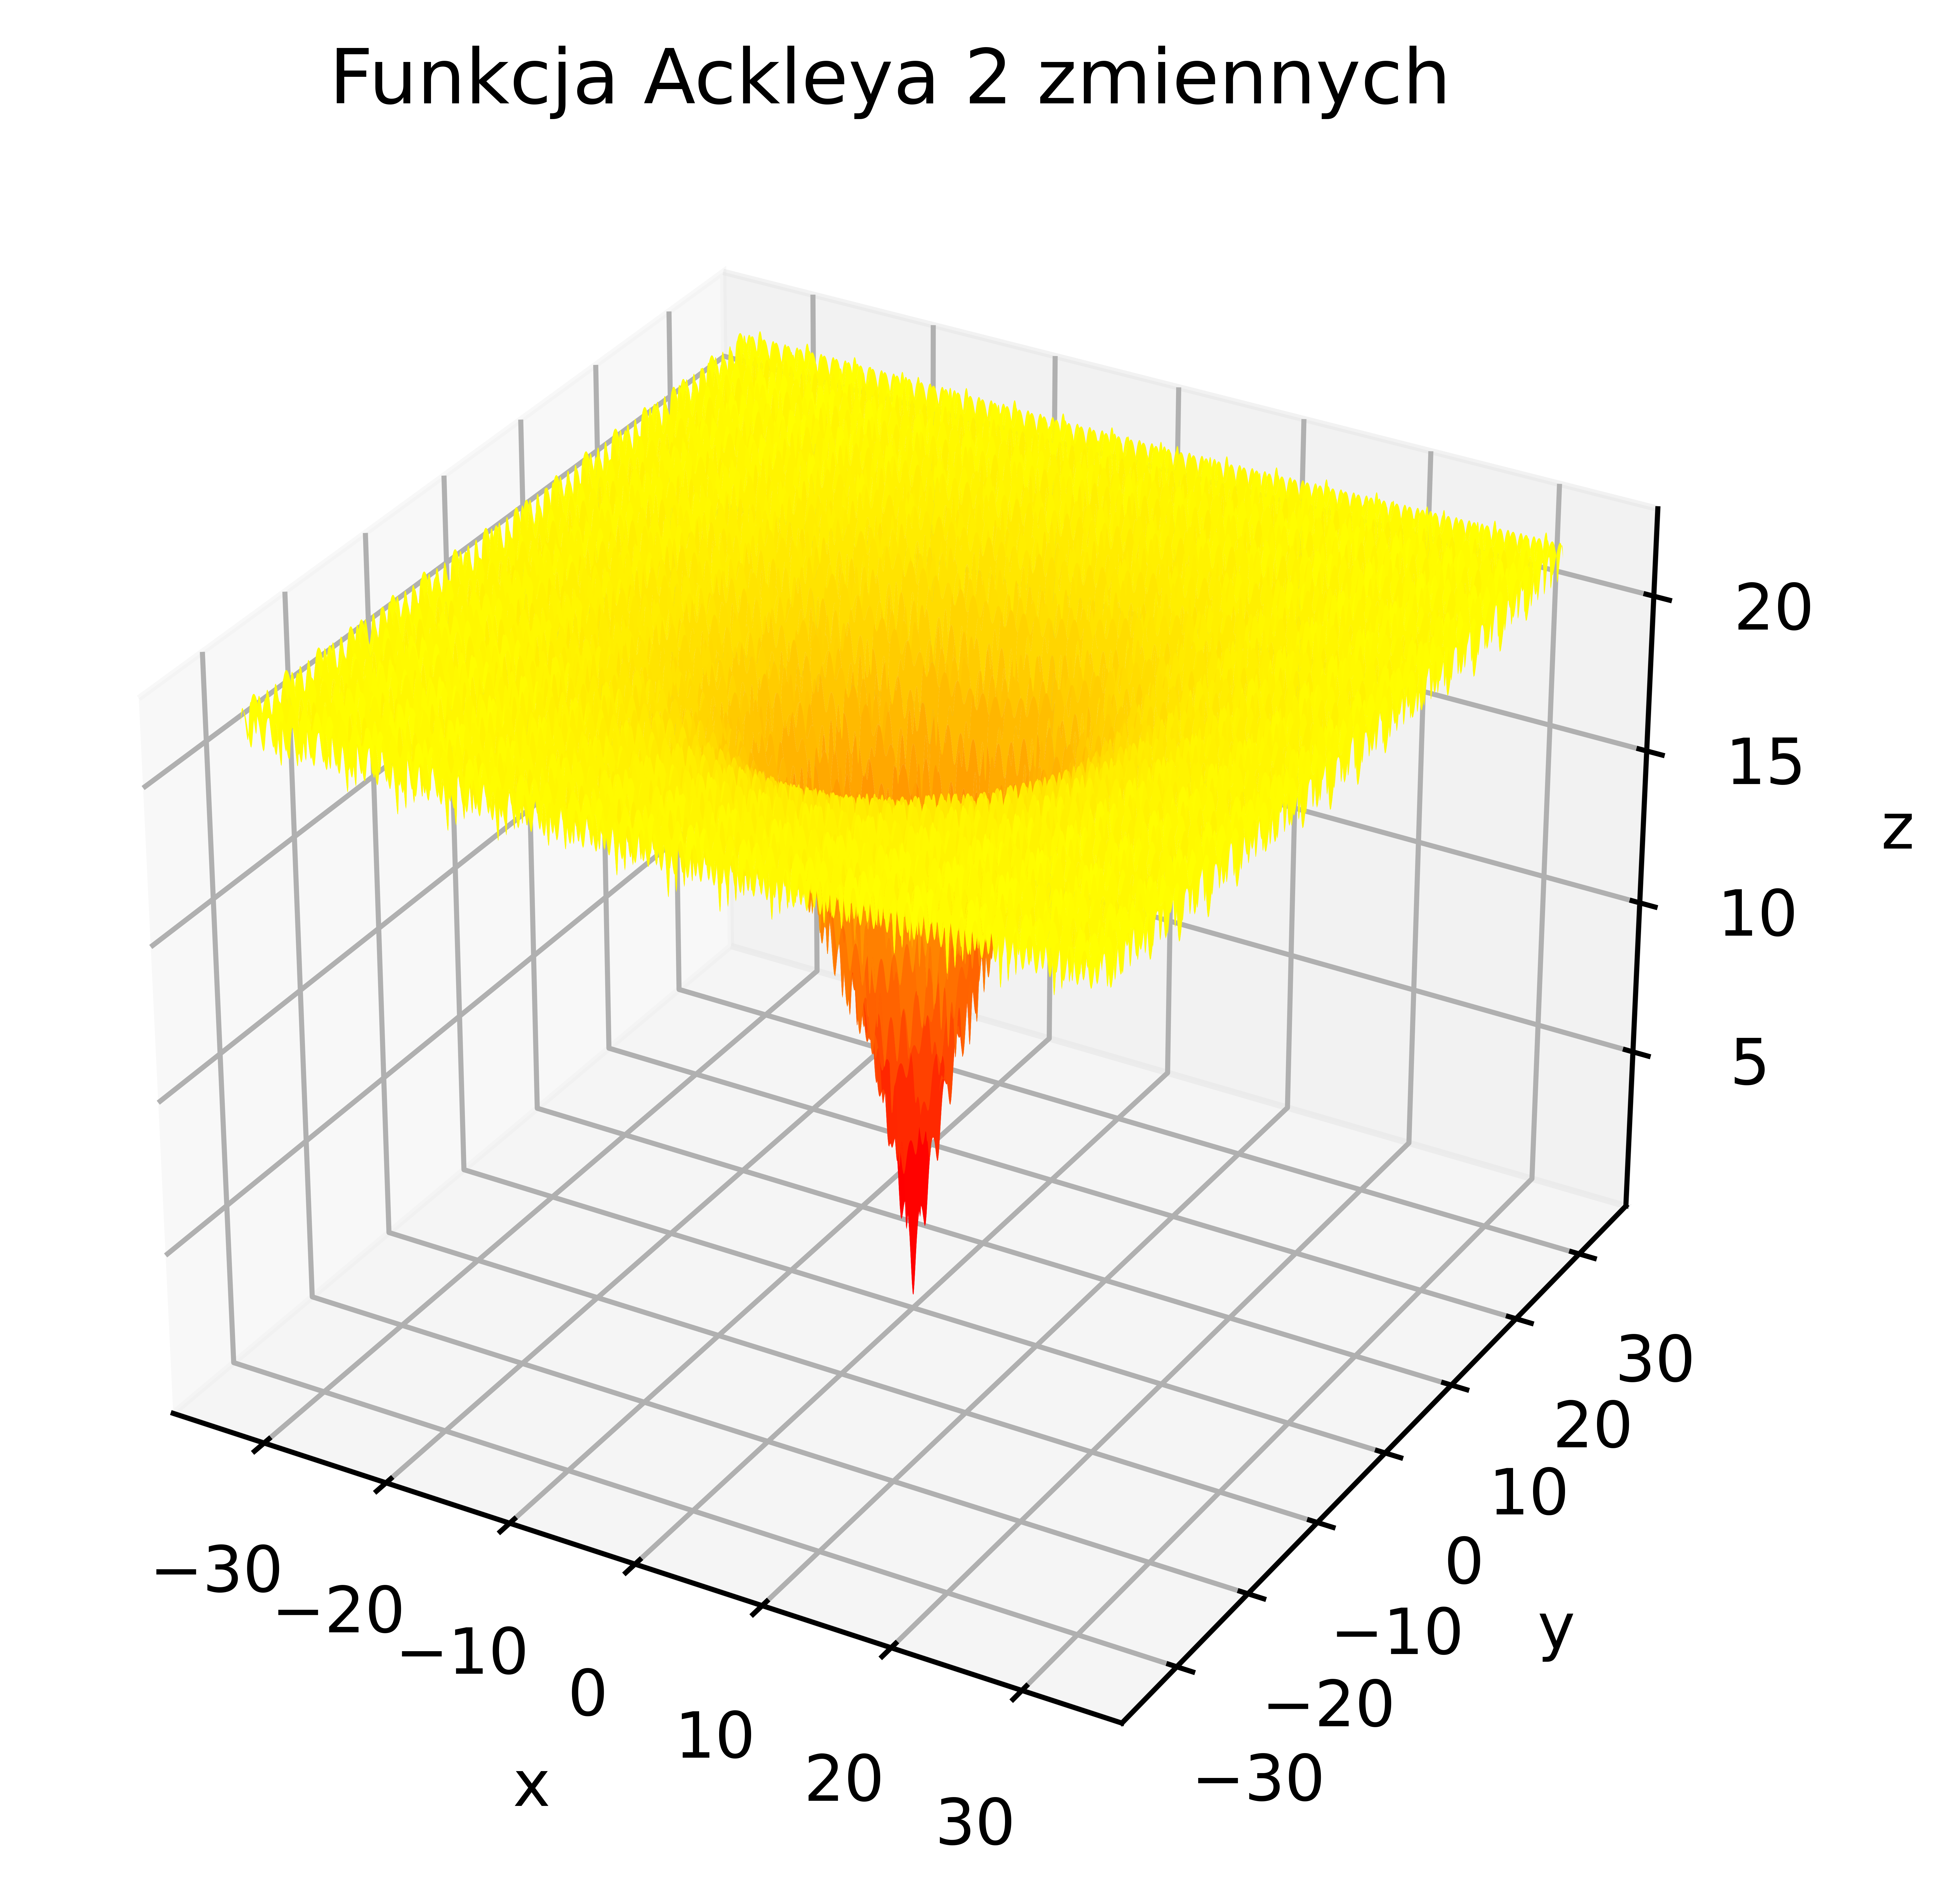

In [57]:
test(x,y) = x * y
min = -32.768
max = - 1* min
size = 10^3
x = collect(LinRange(min,max, size))
y = collect(LinRange(min,max, size))

z = zeros(size,size)
for (num_i, i) = enumerate(x)
  for (num_j, j) = enumerate(y)
    z[num_i, num_j] = f_ackley([i j])
    # println("$(num_i);$(num_j)")
  end
end

der = f_ackley'.(x)

PyPlot.figure(2,dpi=1600)
ax = PyPlot.surf(x, y, z,cmap=ColorMap("autumn"), alpha=1, linewidth=0.25)
xlabel("x")
ylabel("y")
zlabel("z")
grid("on")
PyPlot.title("Funkcja Ackleya 2 zmiennych")
PyPlot.savefig("ackley_2d")

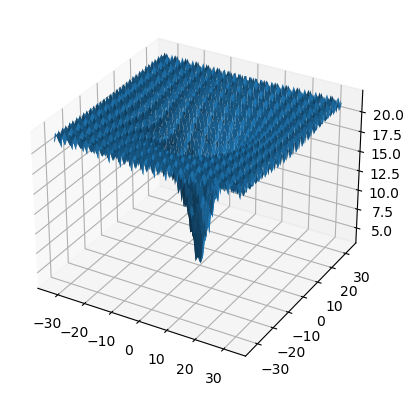

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000055E96AF0>

In [55]:
min = -32.768
max = - 1* min
size = 10^2
x = collect(LinRange(min,max, size))
y = collect(LinRange(min,max, size))

z = zeros(size,size)
for (num_i, i) = enumerate(x)
  for (num_j, j) = enumerate(y)
    z[num_i, num_j] = f_ackley([i j])
  end
end

PyPlot.surf(x, y, z)